## Figure 4

Kexin Dong

Last Update: Jan 23, 2026

## NOTE: NEED TO BE CLEANED.

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
import os
import scipy.stats
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [19]:
FOCUSED = pd.read_csv('MBESv2_focused.csv')

targ_guides = FOCUSED[(FOCUSED['classification']=='targeting guide')] # & (FOCUSED['legacy']==False)]
len(np.unique(targ_guides['gene_name_m']))

127

## 4b

In [3]:
fp = 'crispresso/focused'
ABE_BC_RAW = sorted(os.listdir(f'{fp}/ABE_BC'))
ABE_EPO_RAW = sorted(os.listdir(f'{fp}/ABE_EPO'))
# CBE_BC_RAW = sorted(os.listdir(f'{fp}/CBE_BC'))
# CBE_EPO_RAW = sorted(os.listdir(f'{fp}/CBE_EPO'))

#set filters for minimum number of sensor reads
min_sensor_reads = 100
name_dict = {'men':'Meninges', 'spleen':'Spleen', 'bm':'Bone Marrow', 'd5':'D5', 'd15':'D15', 'lib':'Plasmid', 'input':'Input (D0)'}

In [7]:
ABE = FOCUSED[(FOCUSED['Editor']=='ABE') & (FOCUSED['classification']=='targeting guide')]
# CBE = FOCUSED[(FOCUSED['Editor']=='CBE') & (FOCUSED['classification'].isin(['targeting guide']))]

In [8]:
t = []
corr = []
name = []

for i in ABE_BC_RAW:
    g = pd.read_csv(f'{fp}/ABE_BC/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    #print(len(g))
    g2 = pd.merge(g, ABE, on='gRNA_id')
    #print(len(g2))
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))

list_samples = ['bm']*5+['d15']*5+['d5','input','lib']+['men']*5+['spleen']*5

In [9]:
name = [name_dict[x] for x in list_samples]
ABE_BC_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_BC_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_BC_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_BC_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_BC_EDITING = pd.concat((ABE_BC_editing1, ABE_BC_editing2))

In [10]:
i = 'input_compact_unfiltered.csv'
g = pd.read_csv(f'{fp}/ABE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
g2 = pd.merge(g, ABE, on='gRNA_id')

In [11]:
t = []
corr = []
name = []

for i in ABE_EPO_RAW:
    print(i)
    g = pd.read_csv(f'{fp}/ABE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, ABE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))

list_samples = ['bm']*5+['d15']*5+['d5','input','lib']+['men']*5+['spleen']*5

name = [name_dict[x] for x in list_samples]
ABE_EPO_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_EPO_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_EPO_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_EPO_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_EPO_EDITING = pd.concat((ABE_EPO_editing1, ABE_EPO_editing2))

bm1_compact_unfiltered.csv
bm2_compact_unfiltered.csv
bm3_compact_unfiltered.csv
bm4_compact_unfiltered.csv
bm5_compact_unfiltered.csv
d15-rep1_compact_unfiltered.csv
d15-rep2_compact_unfiltered.csv
d15-rep3_compact_unfiltered.csv
d15-rep4_compact_unfiltered.csv
d15-rep5_compact_unfiltered.csv
d5_compact_unfiltered.csv
input_compact_unfiltered.csv
lib_compact_unfiltered.csv
men1_compact_unfiltered.csv
men2_compact_unfiltered.csv
men3_compact_unfiltered.csv
men4_compact_unfiltered.csv
men5_compact_unfiltered.csv
spleen1_compact_unfiltered.csv
spleen2_compact_unfiltered.csv
spleen3_compact_unfiltered.csv
spleen4_compact_unfiltered.csv
spleen5_compact_unfiltered.csv


In [12]:
ABE_EPO_EDITING

,Sample,Editing %,Edit Type
0,Bone Marrow,84.267874,Target Editing (w/ Bystanders)
1,Bone Marrow,81.777630,Target Editing (w/ Bystanders)
2,Bone Marrow,79.392622,Target Editing (w/ Bystanders)
3,Bone Marrow,81.464935,Target Editing (w/ Bystanders)
4,Bone Marrow,85.275510,Target Editing (w/ Bystanders)
5,D15,81.859461,Target Editing (w/ Bystanders)
6,D15,83.632498,Target Editing (w/ Bystanders)
7,D15,84.709774,Target Editing (w/ Bystanders)
8,D15,83.194145,Target Editing (w/ Bystanders)
9,D15,81.773336,Target Editing (w/ Bystanders)


In [ ]:
t = []
corr = []
name = []

for i in CBE_BC_RAW:
    g = pd.read_csv(f'{fp}/CBE_BC/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*3+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*3+['spleen']*3

name = [name_dict[x] for x in list_samples]
CBE_BC_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_BC_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_BC_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_BC_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_BC_EDITING = pd.concat((CBE_BC_editing1, CBE_BC_editing2))

In [ ]:
t = []
corr = []
name = []

for i in CBE_BC_RAW:
    g = pd.read_csv(f'{fp}/CBE_BC/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE_NGG, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*3+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*3+['spleen']*3

name = [name_dict[x] for x in list_samples]
CBE_BC_editing1_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_BC_editing2_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_BC_editing1_NGG['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_BC_editing2_NGG['Edit Type'] = 'Pure Correct Editing'
CBE_BC_EDITING_NGG = pd.concat((CBE_BC_editing1_NGG, CBE_BC_editing2_NGG))

In [ ]:
t = []
corr = []
name = []

for i in CBE_EPO_RAW:
    g = pd.read_csv(f'{fp}/CBE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*5+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*5+['spleen']*5

name = [name_dict[x] for x in list_samples]
CBE_EPO_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_EPO_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_EPO_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_EPO_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_EPO_EDITING = pd.concat((CBE_EPO_editing1, CBE_EPO_editing2))

In [ ]:
t = []
corr = []
name = []

for i in CBE_EPO_RAW:
    g = pd.read_csv(f'{fp}/CBE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE_NGG, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*5+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*5+['spleen']*5

name = [name_dict[x] for x in list_samples]
CBE_EPO_editing1_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_EPO_editing2_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_EPO_editing1_NGG['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_EPO_editing2_NGG['Edit Type'] = 'Pure Correct Editing'
CBE_EPO_EDITING_NGG = pd.concat((CBE_EPO_editing1_NGG, CBE_EPO_editing2_NGG))

In [ ]:
CBE_EPO_EDITING['Sample'].unique()

array(['Bone Marrow', 'D15', 'D5', 'Input (D0)', 'Plasmid', 'Meninges',
       'Spleen'], dtype=object)

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(8,8), sharey=True, sharex=True)
order = ['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)
sns.barplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)

sns.stripplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=5)
sns.stripplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=5)
sns.stripplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=5)
sns.stripplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=5)

ax[0][0].legend([],[], frameon=False)
ax[0][1].legend([],[], frameon=False)
ax[1][0].legend([],[], frameon=False)
ax[1][1].legend([],[], frameon=False)

ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[0][0].set_xticks([0,20,40,60,80,100])

ax[0][0].spines[['top', 'right']].set_visible(False)
ax[0][0].tick_params(axis='both', which='major', labelsize=16,)
ax[1][0].spines[['top', 'right']].set_visible(False)
ax[1][0].tick_params(axis='both', which='major', labelsize=16,)


ax[0][0].set_title('ABE Barcoding', fontsize = 16)
ax[0][1].set_title('ABE EPO', fontsize = 16)
ax[1][0].set_title('CBE Barcoding (NGG only)', fontsize = 16)
ax[1][1].set_title('CBE EPO (NGG only)', fontsize = 16)

ax[1][0].set_xlabel('Editing %', fontsize=16)
ax[1][1].set_xlabel('Editing %', fontsize=16)

ax[0][1].spines[['top', 'right']].set_visible(False)
ax[0][1].tick_params(axis='both', which='major', labelsize=16,)
ax[1][1].spines[['top', 'right']].set_visible(False)
ax[1][1].tick_params(axis='both', which='major', labelsize=16,)
fig.tight_layout()
fig.savefig('figures/avg_editing_NGG.pdf')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


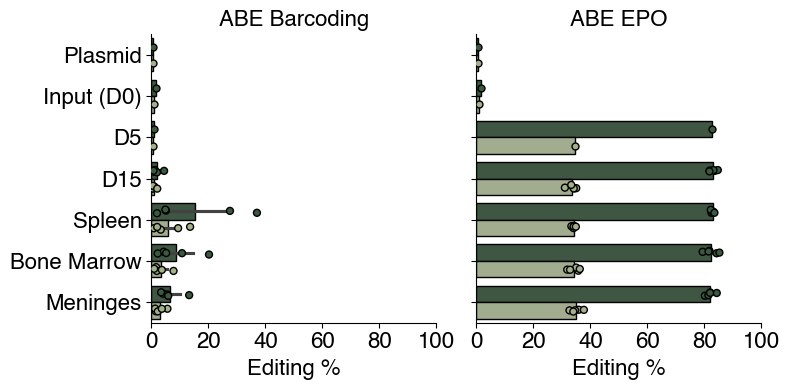

In [21]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
order = ['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'], order=order)
sns.barplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'],order=order)
#sns.barplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
#sns.barplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)

sns.stripplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'], order=order, dodge=True, s=5)
sns.stripplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'],order=order, dodge=True, s=5)
#sns.stripplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=5)
#sns.stripplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=5)

ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)
# ax[1][0].legend([],[], frameon=False)
# ax[1][1].legend([],[], frameon=False)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticks([0,20,40,60,80,100])

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)

ax[0].set_title('ABE Barcoding', fontsize = 16)
ax[1].set_title('ABE EPO', fontsize = 16)
# ax[1][0].set_title('CBE Barcoding (NGG only)', fontsize = 16)
# ax[1][1].set_title('CBE EPO (NGG only)', fontsize = 16)

ax[0].set_xlabel('Editing %', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
fig.tight_layout()
fig.savefig('figures/fig4d.pdf')

## 4c

Comparing the hits called from removing the misbehaved controls or not.

## 4d

Venn plot of hits that we get from different LFC, editing and FDR cut, ABE OG vs ABE focused; 

NOTE: Need to update CBE.

In [3]:
LFC_ABE_OG = pd.read_csv('LFC-FDR/og/ABE_LFC_FDR_df_og.csv')
LFC_ABE_FOCUSED = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_focused.csv')
LFC_ABE_FOCUSED_VS_BC = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_vs_bc.csv')

## 4e

Heatmap of top 10 enrichers of ABE OG Spleen + how that looks in focused.

At the same time, plot for in vitro and other tissues

### OG top 10

In [4]:
LFC_ABE_OG = pd.read_csv('LFC-FDR/og/ABE_LFC_FDR_df_og.csv')
LFC_ABE_FOCUSED = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_focused.csv')
LFC_ABE_FOCUSED_VS_BC = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_vs_bc.csv')

In [5]:
#calculating z-scores for standardization of comparison
samples_focused = ['bm', 'd15', 'd5', 'men', 'spleen']
samples_og = ['bonemarrow','meninges','d15','d5','spleen']

def z_score(df, samples):
    for x in samples:
        col_median = f'LFC_median_{x}'
        avg = np.average(df[col_median])
        std = np.std(df[col_median])
        z_scores = (df[col_median]-avg)/std
        df[f'z_score_{x}'] = z_scores
    return df

LFC_ABE_FOCUSED = z_score(LFC_ABE_FOCUSED, samples_focused)
#LFC_CBE = z_score(LFC_CBE, samples)
LFC_ABE_OG = z_score(LFC_ABE_OG, samples_og)
#LFC_CBE_OG = z_score(LFC_CBE_OG, samples_og)
LFC_ABE_FOCUSED_VS_BC = z_score(LFC_ABE_FOCUSED_VS_BC, samples_focused)

In [6]:
col_og = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bonemarrow','LFC_median_meninges','LFC_median_d15', 'z_score_spleen','z_score_bonemarrow','z_score_meninges','z_score_d15']
col_focused = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bm','LFC_median_men','LFC_median_d15','z_score_spleen','z_score_bm','z_score_men','z_score_d15']

In [7]:
name_dict = dict(zip(['d15','bm','spleen','men'],[
    'In Vitro',
    'Bone Marrow',
    'Spleen','Meninges'
]))

In [8]:
df = LFC_ABE_OG[col_og]
df.columns = ['gRNA_id','Gene','og_spleen','og_bm','og_men','og_d15', 'og_z_score_spleen','og_z_score_bm','og_z_score_men','og_z_score_d15']

In [9]:
df_2 = LFC_ABE_FOCUSED[col_focused]
df_2.columns = ['gRNA_id','Gene','focused_spleen','focused_bm','focused_men','focused_d15','focused_z_score_spleen','focused_z_score_bm','focused_z_score_men','focused_z_score_d15']
df = pd.merge(df, df_2, on=['gRNA_id','Gene'])

df_3 = LFC_ABE_FOCUSED_VS_BC[col_focused]
df_3.columns = ['gRNA_id','Gene','vs_bc_spleen','vs_bc_bm','vs_bc_men','vs_bc_d15','vs_bc_z_score_spleen','vs_bc_z_score_bm','vs_bc_z_score_men','vs_bc_z_score_d15']   
df = pd.merge(df, df_3, on=['gRNA_id','Gene'])

df

,gRNA_id,Gene,og_spleen,og_bm,og_men,og_d15,og_z_score_spleen,og_z_score_bm,og_z_score_men,og_z_score_d15,...,focused_z_score_men,focused_z_score_d15,vs_bc_spleen,vs_bc_bm,vs_bc_men,vs_bc_d15,vs_bc_z_score_spleen,vs_bc_z_score_bm,vs_bc_z_score_men,vs_bc_z_score_d15
0,gRNA_2,Abl1,1.434236,1.495161,1.249886,-0.889060,1.568088,1.929737,1.794715,-1.561318,...,0.642984,-4.016517,-0.320979,-0.680754,3.385965,-0.263412,-0.630588,-0.898736,2.156949,-0.534225
1,gRNA_85,Akt1,-0.030999,1.885135,-1.336062,-0.160383,0.041922,2.361269,-0.486647,-0.422771,...,-0.494536,0.922055,0.340899,-0.688184,0.369454,-0.105014,0.443609,-0.906237,0.152840,-0.313641
2,gRNA_871,Arid2,1.222135,0.744087,-1.167098,0.540824,1.347166,1.098624,-0.337584,0.672854,...,0.190933,0.940937,-0.462095,0.162476,-2.187726,0.893646,-0.859612,-0.047438,-1.546099,1.077087
3,gRNA_895,Arid5b,1.887682,2.830944,1.147635,2.028719,2.040389,3.407869,1.704508,2.997668,...,1.161259,1.333232,1.177462,3.041594,0.050392,1.422703,1.801310,2.859225,-0.059138,1.813848
4,gRNA_896,Arid5b,1.828098,2.328855,0.250466,1.000534,1.978328,2.852274,0.913012,1.391145,...,0.726268,0.704551,0.515846,0.314315,1.456724,0.776852,0.727539,0.105853,0.875200,0.914439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,gRNA_12602,Trp53,0.180680,1.025775,-0.671477,-0.047426,0.262404,1.410330,0.099660,-0.246278,...,-0.296277,-0.860060,-0.180025,0.695829,-0.582416,-0.532603,-0.401826,0.491017,-0.479563,-0.909098
166,gRNA_12604,Trp53,2.321278,1.526947,0.762700,1.566673,2.492016,1.964910,1.364913,2.275728,...,0.891018,0.449552,0.723427,-0.197588,2.269225,0.967740,1.064432,-0.410947,1.415010,1.180270
167,gRNA_12652,Trp53bp1,0.283331,1.358787,-0.732068,-0.137931,0.369323,1.778830,0.046206,-0.387691,...,0.588415,-0.760602,-0.121973,-0.495748,-0.128449,-0.668991,-0.307611,-0.711959,-0.177957,-1.099031
168,gRNA_12831,Tsc1,0.513632,0.850011,-1.221844,1.278838,0.609201,1.215835,-0.385882,1.825990,...,-0.343392,0.808649,-0.281691,1.432865,1.609559,0.270424,-0.566826,1.235105,0.976740,0.209192


In [10]:
LIB = pd.read_csv('MBESv2_CORRECTED.csv')

In [11]:
df_gene = LIB[['gene_name_h','gene_name_m']].copy()
df_gene.columns = ['gene_name_h','Gene']
df_gene = df_gene.drop_duplicates()

In [12]:
df = pd.merge(df, df_gene, on='Gene', how='left')

In [13]:
cosmic = pd.read_csv('source-data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in df.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

df['Role in Cancer']=gene_type

In [14]:
df = df.merge(LFC_ABE_OG[['gRNA_id','FDR_d15_fishers','FDR_spleen_fishers','FDR_bonemarrow_fishers','FDR_meninges_fishers','target_base_edit_perc',
                          'HGVSp_h','HGVSp_m']], on='gRNA_id')

In [31]:
tissues = ['d15','spleen','bm','men']
tissues_og = ['d15','spleen','bonemarrow','meninges']
tissues_name = ['In Vitro','Spleen','Bone Marrow','Meninges']

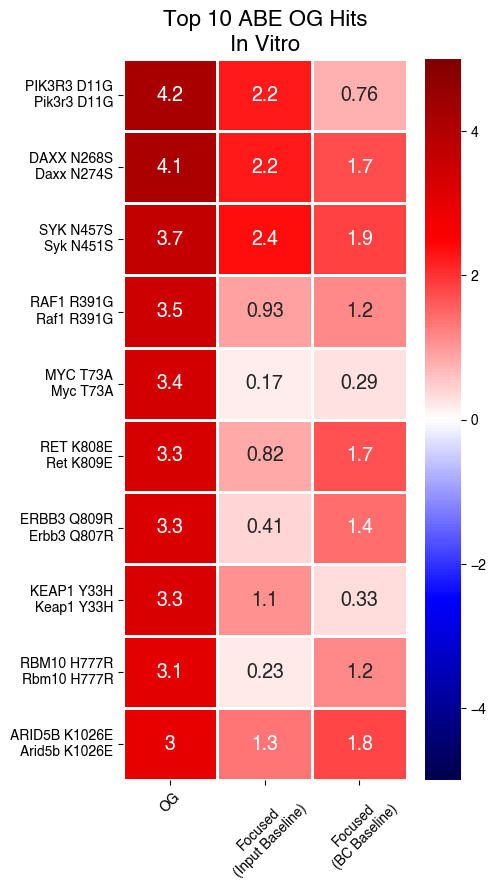

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


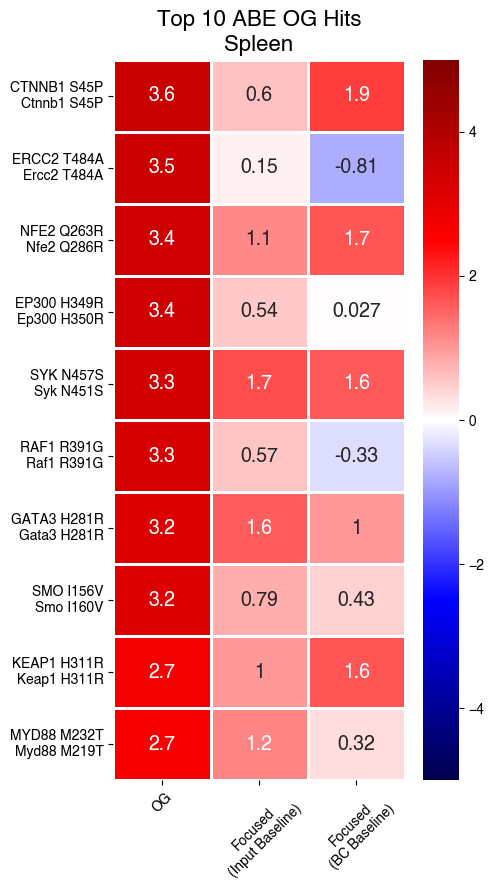

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


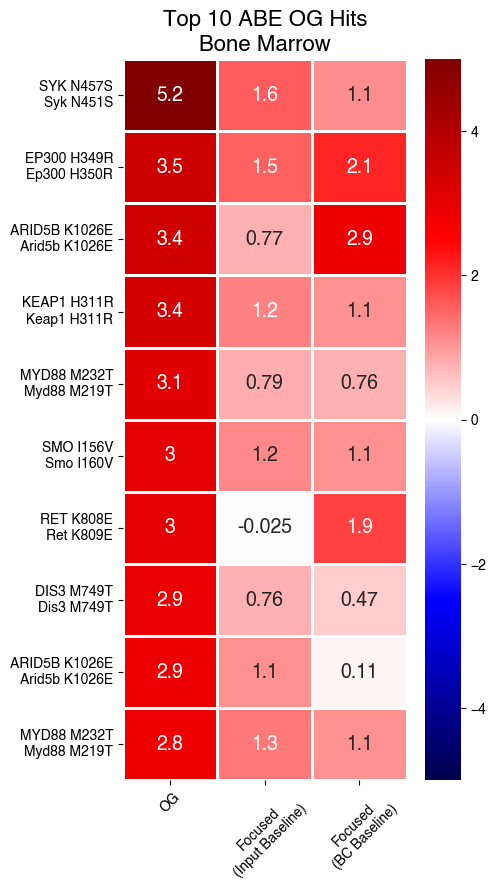

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


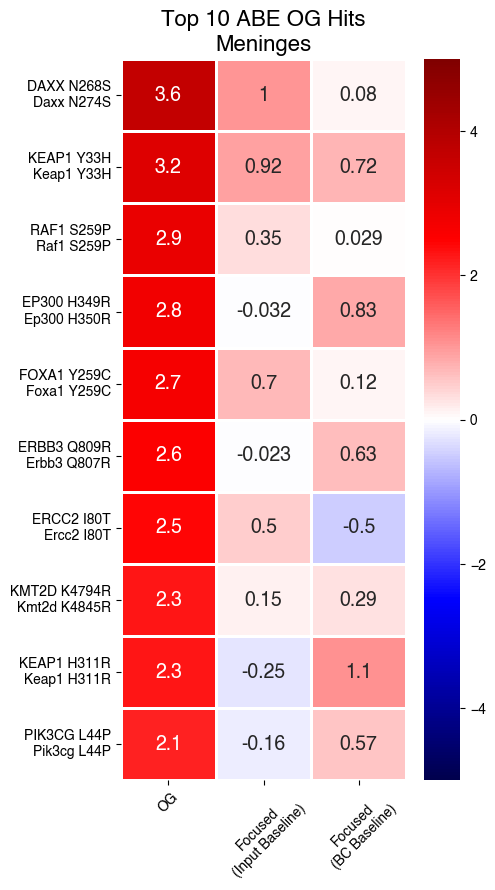

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [35]:
FDR_cutoff = .1
editing_cutoff = 20
hits_to_plot = 10

for i,t in enumerate(tissues):

    t2 = tissues_og[i]
    title_name = tissues_name[i]
    a1 = df[(df[f'FDR_{t2}_fishers']<FDR_cutoff) & (df['target_base_edit_perc']>=editing_cutoff)].copy()

    a1 = a1.sort_values(by=f'og_z_score_{t}', ascending=False).reset_index(drop=True)
    a1 = a1.iloc[:hits_to_plot,:]

    fig, ax = plt.subplots(figsize=(5,9))

    g = sns.heatmap(a1[[f'og_z_score_{t}', f'focused_z_score_{t}',f'vs_bc_z_score_{t}']], cmap='seismic', 
                    annot=True, 
                    annot_kws={'size':14}, 
                    linewidth=1, 
                    edgecolor='white',
                    vmin=-5,
                    vmax=5,)

    name = []

    for i, val in a1.iterrows():
        a = val['gene_name_h']
        b = val['HGVSp_h']
        c = val['Gene']
        d = val['HGVSp_m']

        if type(b) != str:
            b = 'Non-coding'

        n = f'{a} {b}\n{c} {d}'
        name.append(n)

    g.set_yticklabels(name, rotation=0)
    g.set_xticklabels(['OG', 'Focused\n(Input Baseline)','Focused\n(BC Baseline)'], rotation=45, fontsize=10)
    plt.title(f'Top 10 ABE OG Hits\n{title_name}', fontsize=16)
    fig.tight_layout()
    plt.show()
    fig.savefig(f'figures/heatmap_ABE_OG_top10_{title_name}.pdf', transparent=True)

### Focused input baseline top 10

In [36]:
LFC_ABE_OG = pd.read_csv('LFC-FDR/og/ABE_LFC_FDR_df_og.csv')
LFC_ABE_FOCUSED = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_focused.csv')
LFC_ABE_FOCUSED_VS_BC = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_vs_bc.csv')

In [37]:
#calculating z-scores for standardization of comparison
samples_focused = ['bm', 'd15', 'd5', 'men', 'spleen']
samples_og = ['bonemarrow','meninges','d15','d5','spleen']

def z_score(df, samples):
    for x in samples:
        col_median = f'LFC_median_{x}'
        avg = np.average(df[col_median])
        std = np.std(df[col_median])
        z_scores = (df[col_median]-avg)/std
        df[f'z_score_{x}'] = z_scores
    return df

LFC_ABE_FOCUSED = z_score(LFC_ABE_FOCUSED, samples_focused)
#LFC_CBE = z_score(LFC_CBE, samples)
LFC_ABE_OG = z_score(LFC_ABE_OG, samples_og)
#LFC_CBE_OG = z_score(LFC_CBE_OG, samples_og)
LFC_ABE_FOCUSED_VS_BC = z_score(LFC_ABE_FOCUSED_VS_BC, samples_focused)

In [38]:
col_og = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bonemarrow','LFC_median_meninges','LFC_median_d15', 'z_score_spleen','z_score_bonemarrow','z_score_meninges','z_score_d15']
col_focused = ['gRNA_id','Gene','LFC_median_spleen','LFC_median_bm','LFC_median_men','LFC_median_d15','z_score_spleen','z_score_bm','z_score_men','z_score_d15']

In [39]:
name_dict = dict(zip(['d15','bm','spleen','men'],[
    'In Vitro',
    'Bone Marrow',
    'Spleen','Meninges'
]))

In [40]:
df = LFC_ABE_OG[col_og]
df.columns = ['gRNA_id','Gene','og_spleen','og_bm','og_men','og_d15', 'og_z_score_spleen','og_z_score_bm','og_z_score_men','og_z_score_d15']

In [41]:
df_2 = LFC_ABE_FOCUSED[col_focused]
df_2.columns = ['gRNA_id','Gene','focused_spleen','focused_bm','focused_men','focused_d15','focused_z_score_spleen','focused_z_score_bm','focused_z_score_men','focused_z_score_d15']
df = pd.merge(df, df_2, on=['gRNA_id','Gene'])

df_3 = LFC_ABE_FOCUSED_VS_BC[col_focused]
df_3.columns = ['gRNA_id','Gene','vs_bc_spleen','vs_bc_bm','vs_bc_men','vs_bc_d15','vs_bc_z_score_spleen','vs_bc_z_score_bm','vs_bc_z_score_men','vs_bc_z_score_d15']   
df = pd.merge(df, df_3, on=['gRNA_id','Gene'])

df

,gRNA_id,Gene,og_spleen,og_bm,og_men,og_d15,og_z_score_spleen,og_z_score_bm,og_z_score_men,og_z_score_d15,...,focused_z_score_men,focused_z_score_d15,vs_bc_spleen,vs_bc_bm,vs_bc_men,vs_bc_d15,vs_bc_z_score_spleen,vs_bc_z_score_bm,vs_bc_z_score_men,vs_bc_z_score_d15
0,gRNA_2,Abl1,1.434236,1.495161,1.249886,-0.889060,1.568088,1.929737,1.794715,-1.561318,...,0.642984,-4.016517,-0.320979,-0.680754,3.385965,-0.263412,-0.630588,-0.898736,2.156949,-0.534225
1,gRNA_85,Akt1,-0.030999,1.885135,-1.336062,-0.160383,0.041922,2.361269,-0.486647,-0.422771,...,-0.494536,0.922055,0.340899,-0.688184,0.369454,-0.105014,0.443609,-0.906237,0.152840,-0.313641
2,gRNA_871,Arid2,1.222135,0.744087,-1.167098,0.540824,1.347166,1.098624,-0.337584,0.672854,...,0.190933,0.940937,-0.462095,0.162476,-2.187726,0.893646,-0.859612,-0.047438,-1.546099,1.077087
3,gRNA_895,Arid5b,1.887682,2.830944,1.147635,2.028719,2.040389,3.407869,1.704508,2.997668,...,1.161259,1.333232,1.177462,3.041594,0.050392,1.422703,1.801310,2.859225,-0.059138,1.813848
4,gRNA_896,Arid5b,1.828098,2.328855,0.250466,1.000534,1.978328,2.852274,0.913012,1.391145,...,0.726268,0.704551,0.515846,0.314315,1.456724,0.776852,0.727539,0.105853,0.875200,0.914439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,gRNA_12602,Trp53,0.180680,1.025775,-0.671477,-0.047426,0.262404,1.410330,0.099660,-0.246278,...,-0.296277,-0.860060,-0.180025,0.695829,-0.582416,-0.532603,-0.401826,0.491017,-0.479563,-0.909098
166,gRNA_12604,Trp53,2.321278,1.526947,0.762700,1.566673,2.492016,1.964910,1.364913,2.275728,...,0.891018,0.449552,0.723427,-0.197588,2.269225,0.967740,1.064432,-0.410947,1.415010,1.180270
167,gRNA_12652,Trp53bp1,0.283331,1.358787,-0.732068,-0.137931,0.369323,1.778830,0.046206,-0.387691,...,0.588415,-0.760602,-0.121973,-0.495748,-0.128449,-0.668991,-0.307611,-0.711959,-0.177957,-1.099031
168,gRNA_12831,Tsc1,0.513632,0.850011,-1.221844,1.278838,0.609201,1.215835,-0.385882,1.825990,...,-0.343392,0.808649,-0.281691,1.432865,1.609559,0.270424,-0.566826,1.235105,0.976740,0.209192


In [42]:
# add target edit perc and FDRs for focused input baseline.
df_fdr = LFC_ABE_FOCUSED[['gRNA_id','FDR_d15_fishers','FDR_spleen_fishers','FDR_bm_fishers','FDR_men_fishers','target_base_edit_perc']]
df = df.merge(df_fdr, on='gRNA_id')

In [43]:
LIB = pd.read_csv('MBESv2_CORRECTED.csv')

In [44]:
df_gene = LIB[['gene_name_h','gene_name_m']].copy()
df_gene.columns = ['gene_name_h','Gene']
df_gene = df_gene.drop_duplicates()

In [45]:
df = pd.merge(df, df_gene, on='Gene', how='left')

In [46]:
cosmic = pd.read_csv('source-data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in df.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

df['Role in Cancer']=gene_type

In [47]:
df = df.merge(LFC_ABE_OG[['gRNA_id','HGVSp_h','HGVSp_m']], on='gRNA_id')

In [49]:
tissues = ['d15','spleen','bm','men']
tissues_og = ['d15','spleen','bonemarrow','meninges']
tissues_name = ['In Vitro','Spleen','Bone Marrow','Meninges']

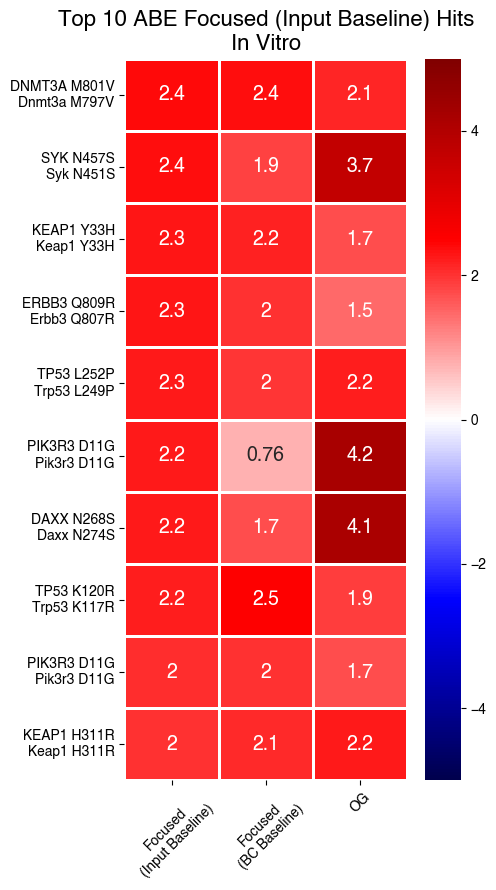

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


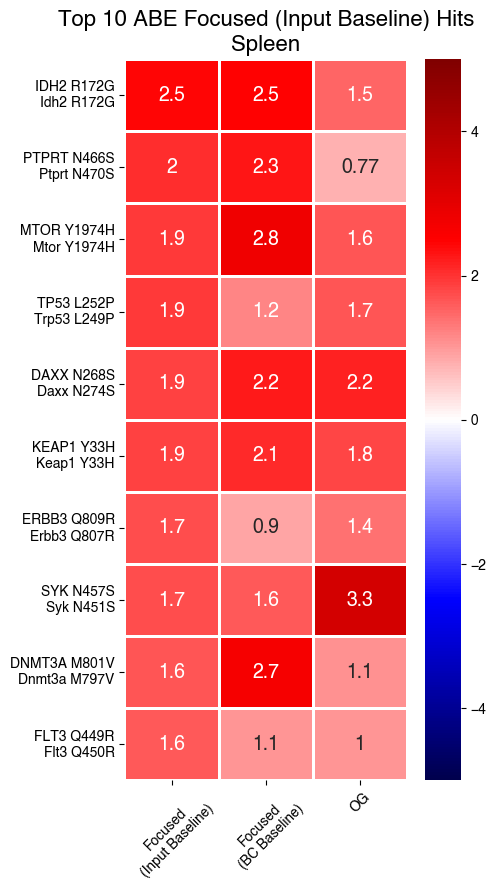

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


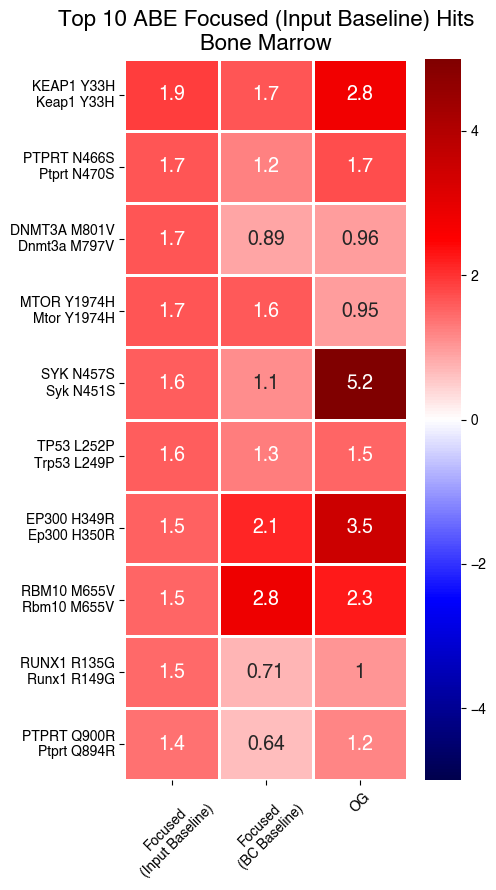

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


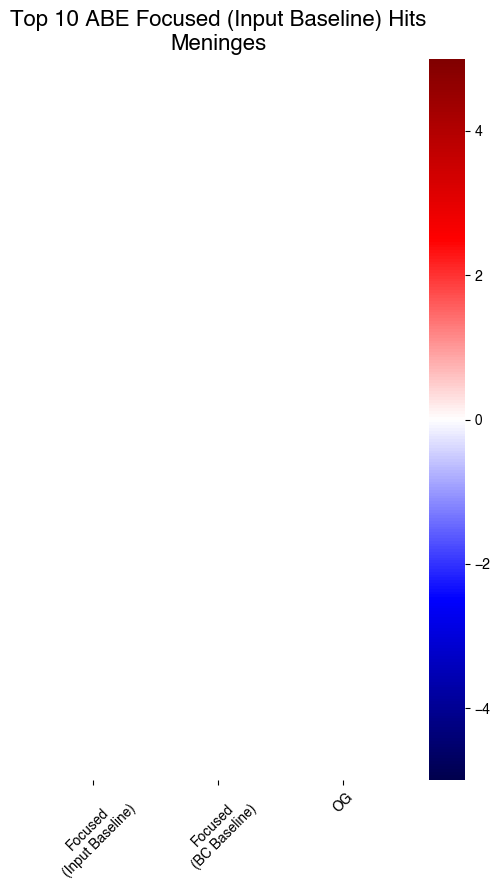

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [51]:
FDR_cutoff = .1
editing_cutoff = 20
hits_to_plot = 10

for i,t in enumerate(tissues):

    t2 = tissues_og[i]
    title_name = tissues_name[i]

    a1 = df[(df[f'FDR_{t}_fishers']<FDR_cutoff) & (df['target_base_edit_perc']>=editing_cutoff)].copy()

    a1 = a1.sort_values(by=f'focused_z_score_{t}', ascending=False).reset_index(drop=True)
    a1 = a1.iloc[:hits_to_plot,:]

    fig, ax = plt.subplots(figsize=(5,9))

    g = sns.heatmap(a1[[f'focused_z_score_{t}',f'vs_bc_z_score_{t}',f'og_z_score_{t}',]], cmap='seismic', 
                    annot=True, 
                    annot_kws={'size':14}, 
                    linewidth=1, 
                    edgecolor='white',
                    vmin=-5,
                    vmax=5,)

    name = []

    for i, val in a1.iterrows():
        a = val['gene_name_h']
        b = val['HGVSp_h']
        c = val['Gene']
        d = val['HGVSp_m']

        if type(b) != str:
            b = 'Non-coding'

        n = f'{a} {b}\n{c} {d}'
        name.append(n)

    g.set_yticklabels(name, rotation=0)
    g.set_xticklabels(['Focused\n(Input Baseline)','Focused\n(BC Baseline)','OG',], rotation=45, fontsize=10)
    plt.title(f'Top 10 ABE Focused (Input Baseline) Hits\n{title_name}', fontsize=16)
    fig.tight_layout()
    plt.show()
    fig.savefig(f'figures/heatmap_ABE_focused_top10_{title_name}.pdf', transparent=True)

### Out of Jon's curiosity, check...bar plot

# Other plots

Bar plot for hits in the ABE library

In vitro specific

Etc

In [23]:
LFC_ABE_OG = pd.read_csv('LFC-FDR/og/ABE_LFC_FDR_df_og.csv')
LFC_CBE_OG = pd.read_csv('LFC-FDR/og/CBE_LFC_FDR_df_og.csv')
LFC_ABE_OG['Editor']='ABE'
LFC_CBE_OG['Editor']='CBE'

LFC_comb = pd.concat((LFC_ABE_OG, LFC_CBE_OG))

min_input_counts = 2

#key = ['gene_name_m_corrected', 'LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']
#val = ['gene_name_m', 'LFC_In Vitro D15', 'LFC_Spleen', 'LFC_Bone', 'LFC_Meninges']

#col_dict = dict(zip(key, val))

master_targ = LFC_comb[(LFC_comb['classification']=='targeting guide') & (LFC_comb['Input_median']>=min_input_counts)].reset_index(drop=True) #.rename(columns=col_dict)

#and add TSG/Oncogene info

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in master_targ.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

master_targ['Role in Cancer']=gene_type

In [62]:
def barplotter(subset, save_name, figtitle, figwidth=12.5, figheight=4.5, save=False, lib = 'og'):
    """ 
    Function for making barplots/stripplots showing editing percentage in all tissues
    """

    t1 = subset.fillna('Non-coding')

    if lib == 'og':

        CBE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4','spleen5','spleen6','spleen7','spleen8','spleen9'],
        'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5','bonemarrow6','bonemarrow7','bonemarrow8','bonemarrow9','bonemarrow10'],
        'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5','meninges6','meninges7','meninges8','meninges9','meninges10',],
        'd5':['d5_rep1','d5_rep2','d5_rep3'],
        'd15':['d15_rep1','d15_rep2','d15_rep3'],
        'plasmid_lib':['plasmidlib']}

        ABE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4'],
        'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5'],
        'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5'],
        'd5':['d5_rep1','d5_rep2','d5_rep3'],
        'd15':['d15_rep1','d15_rep2','d15_rep3'],
        'plasmid_lib':['plasmidlib']}

    elif lib == 'focused':
        CBE_samp_dict = {'spleen':['spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'],
        'bonemarrow':['bm1', 'bm2', 'bm3', 'bm4', 'bm5'],
        'meninges':['men1', 'men2', 'men3','men4', 'men5'],
        'd5':['d5'],
        'd15':['d15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5'],
        'plasmid_lib':['lib']}

        ABE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4','spleen5'],
        'bonemarrow':['bm1', 'bm2', 'bm3', 'bm4', 'bm5'],
        'meninges':['men1', 'men2', 'men3','men4', 'men5'],
        'd5':['d5'],
        'd15':['d15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5'],
        'plasmid_lib':['lib']}

    samples2 = ['d15', 'spleen', 'bonemarrow', 'meninges']

    name = []
    tissue = []
    LFC = []
    gRNA_id = []

    xlabs = []
    for i, val in t1.iterrows():
        
        a = val['gene_name_h']
        b = val['HGVSp_h']
        c = val['gene_name_m_corrected']
        d = val['HGVSp_m']

        if b[:2]=='p.':
            b = b[2:]
        if 'delins' in b:
            b = b.replace('delins', '')
        if d=='Not calculated (legacy)':
            d = b
        

        editor = val['Editor']

        n = f'{a} {b}\n{c} {d}'

        xlabs.append(n)
        for s in samples2:

            if editor=='ABE':
                samps = ABE_samp_dict[s]
            elif editor=='CBE':
                samps = CBE_samp_dict[s]

            for j in samps:
                LFC.append(val[j])
                name.append(n)
                tissue.append(s)
                gRNA_id.append(val['gRNA_id'])
        


    plotting_df = pd.DataFrame(dict(zip(['gRNA_id', 'Mutation', 'Tissue', 'LFC'], [gRNA_id, name, tissue, LFC])))
        
    fig, ax = plt.subplots(2,1, figsize=(figwidth,figheight), height_ratios=[1,7], sharex=False)

    palette = ['#F9CBA8', '#ED6A50', '#7284A1', 'lightgrey', 'darkslategray']

    palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]

    sns.heatmap([np.asarray(t1['target_base_edit_perc'])], ax=ax[0], cbar=False, cmap='Reds', linewidth=1, annot=True, annot_kws={"fontsize":12}, vmin=0, vmax=100,fmt='.3g')
    g = sns.boxplot(data=plotting_df, x='gRNA_id', y='LFC', hue='Tissue', ax=ax[1], legend=False, palette=palette, showfliers=False)
    sns.stripplot(data=plotting_df, x='gRNA_id', y='LFC', hue='Tissue', ax=ax[1], dodge=True, edgecolor='black', linewidth=1, legend=False, palette=palette)

    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticklabels(xlabs)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('LFC', fontsize=12)

    #ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
    ax[1].spines[['top', 'right']].set_visible(False)
    ax[1].tick_params(axis='x', which='major', labelsize=10)
    ax[1].tick_params(axis='y', which='major', labelsize=12)

    color_dict = {'ABE':'tab:purple', 'CBE':'tab:blue'}
    t2 = list(t1['Editor'])
    for idx, tick_label in enumerate(g.axes.get_xticklabels()):

        tick_label.set_color(color_dict[t2[idx]])

    ax[1].axhline(0, linestyle='dashed', color='black', linewidth=.5)

    for k in range(len(t1)-1):
        ax[1].axvline(k+.5, linestyle='dashed', color='black', linewidth=.5)

    ax[0].set_title(f'{figtitle}', fontsize=14)

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    if save==True:
        fig.savefig(f'figures/{save_name}.pdf')

In [33]:
FDR_cutoff = .1

# in vitro specific
#spleen, meninges, bone LFC <0
#in vitro LFC > 01
# FDR <.1 in vitro
t = master_targ.sort_values(by='LFC_median_d15', ascending=False)
invitro_specific = t[(t['LFC_median_spleen']<0) & (t['LFC_median_meninges']<0) & (t['LFC_median_bonemarrow']<0) & (t['LFC_median_d15']>1) & (t['target_base_edit_perc']>=1) & (t['FDR_d15_fishers']<FDR_cutoff)]
print(f'in vitro specific: {len(invitro_specific)}')

# in vivo specific
#spleen, meninges, bone LFC >0
#in vitro LFC < 0
# FDR <.1 in at least 1 in vivo context
t2 = master_targ.sort_values(by='LFC_median_d15', ascending=True)
invivo_specific = t2[(t2['LFC_median_spleen']>0) & (t2['LFC_median_meninges']>0) & (t2['LFC_median_bonemarrow']>0) & (t2['LFC_median_d15']<0) & (t2['target_base_edit_perc']>=1)]
#FDR thresholding
invivo_specific2 = invivo_specific[(invivo_specific['FDR_spleen_fishers']<FDR_cutoff) | (invivo_specific['FDR_bonemarrow_fishers']<FDR_cutoff) | (invivo_specific['FDR_meninges_fishers']<FDR_cutoff)]
invivo_specific2 = invivo_specific2.sort_values(by='LFC_median_d15', ascending=True)
print(f'in vivo specific: {len(invivo_specific2)}')

# spleen/bone specific
# spleen LFC >1 (not thresholding on bonemarrow; goes in step with spleen)
# meninges, in vitro LFC <0
# FDR <.1 in spleen
t3 = master_targ.sort_values(by='LFC_median_spleen', ascending=False)
bonespleen_specific = t3[(t3['LFC_median_spleen']>1) & (t3['LFC_median_meninges']<0) & (t3['LFC_median_d15']<0) & (t3['target_base_edit_perc']>=1) & (t3['FDR_spleen_fishers']<FDR_cutoff)]
print(f'bone/spleen specific: {len(bonespleen_specific)}')

#meninges specific (NO HITS)
# meninges LFC >0
# other LFC <0
# FDR <.1 in meninges 
t4 = master_targ.sort_values(by='LFC_median_meninges', ascending=False)
meninges_specific = t4[(t4['LFC_median_spleen']<0) & (t4['LFC_median_meninges']>0) & (t4['LFC_median_d15']<0) & (t4['target_base_edit_perc']>=1) & (t4['FDR_meninges_fishers']<FDR_cutoff)]
print(f'meninges specific: {len(meninges_specific)}')

in vitro specific: 7
in vivo specific: 22
bone/spleen specific: 81
meninges specific: 0


In [55]:
LFC_ABE_FOCUSED = pd.read_csv('LFC-FDR/focused/ABE_LFC_FDR_df_focused.csv')
LFC_CBE_FOCUSED = pd.read_csv('LFC-FDR/focused/CBE_LFC_FDR_df_focused.csv')
LFC_ABE_FOCUSED['Editor']='ABE'
LFC_CBE_FOCUSED['Editor']='CBE'

LFC_comb_focused = pd.concat((LFC_ABE_FOCUSED, LFC_CBE_FOCUSED))

In [56]:
invitro_specific = invitro_specific[invitro_specific['gRNA_id'].isin(LFC_comb_focused['gRNA_id'])].reset_index(drop=True)
invitro_specific_focused = LFC_comb_focused[LFC_comb_focused['gRNA_id'].isin(invitro_specific['gRNA_id'])]
invitro_specific_focused['gRNA_id'] = pd.Categorical(
    invitro_specific_focused['gRNA_id'],
    categories=invitro_specific['gRNA_id'],
    ordered=True
)
invitro_specific_focused = invitro_specific_focused.sort_values('gRNA_id')
invitro_specific_focused['gRNA_id'] = invitro_specific_focused['gRNA_id'].astype(str)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


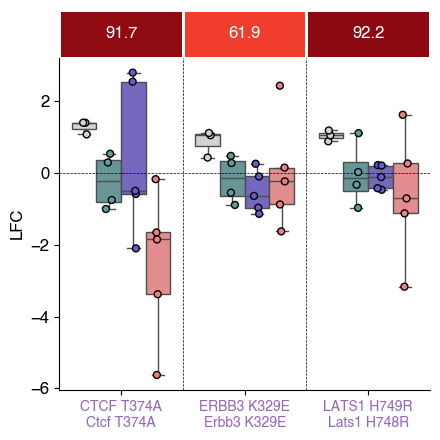

In [75]:
barplotter(invitro_specific, 'invitro_specific_hits', '',figwidth=4.5, figheight=4.5, save=True, lib='og')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


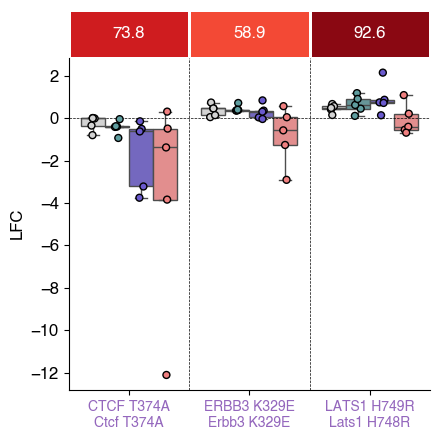

In [76]:
barplotter(invitro_specific_focused, 'invitro_specific_hits_focused', '',figwidth=4.5, figheight=4.5, save=True, lib='focused')

In [64]:
invivo_specific2 = invivo_specific2[invivo_specific2['gRNA_id'].isin(LFC_comb_focused['gRNA_id'])].reset_index(drop=True)
invivo_specific_focused = LFC_comb_focused[LFC_comb_focused['gRNA_id'].isin(invivo_specific2['gRNA_id'])]
invivo_specific_focused['gRNA_id'] = pd.Categorical(
    invivo_specific_focused['gRNA_id'],
    categories=invivo_specific2['gRNA_id'],
    ordered=True
)
invivo_specific_focused = invivo_specific_focused.sort_values('gRNA_id')
invivo_specific_focused['gRNA_id'] = invivo_specific_focused['gRNA_id'].astype(str)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


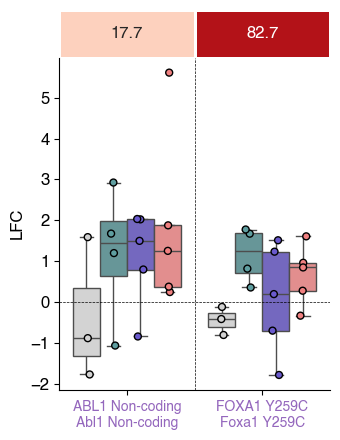

In [77]:
barplotter(invivo_specific2, 'invivo_specific_hits', '',figwidth=3.5, figheight=4.5, save=True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


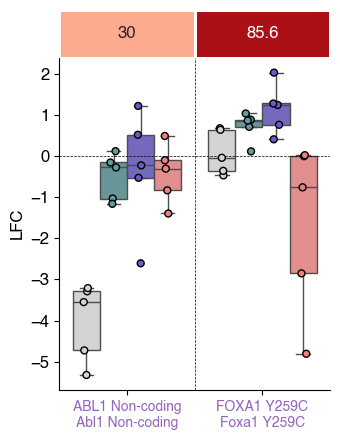

In [78]:
barplotter(invivo_specific_focused, 'invivo_specific_hits_focused', '',figwidth=3.5, figheight=4.5, save=True, lib='focused')

In [70]:
bonespleen_specific = bonespleen_specific[bonespleen_specific['gRNA_id'].isin(LFC_comb_focused['gRNA_id'])].reset_index(drop=True)
bonespleen_specific_focused = LFC_comb_focused[LFC_comb_focused['gRNA_id'].isin(bonespleen_specific['gRNA_id'])]
bonespleen_specific_focused['gRNA_id'] = pd.Categorical(
    bonespleen_specific_focused['gRNA_id'],
    categories=bonespleen_specific['gRNA_id'],
    ordered=True
)
bonespleen_specific_focused = bonespleen_specific_focused.sort_values('gRNA_id')
bonespleen_specific_focused['gRNA_id'] = bonespleen_specific_focused['gRNA_id'].astype(str)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


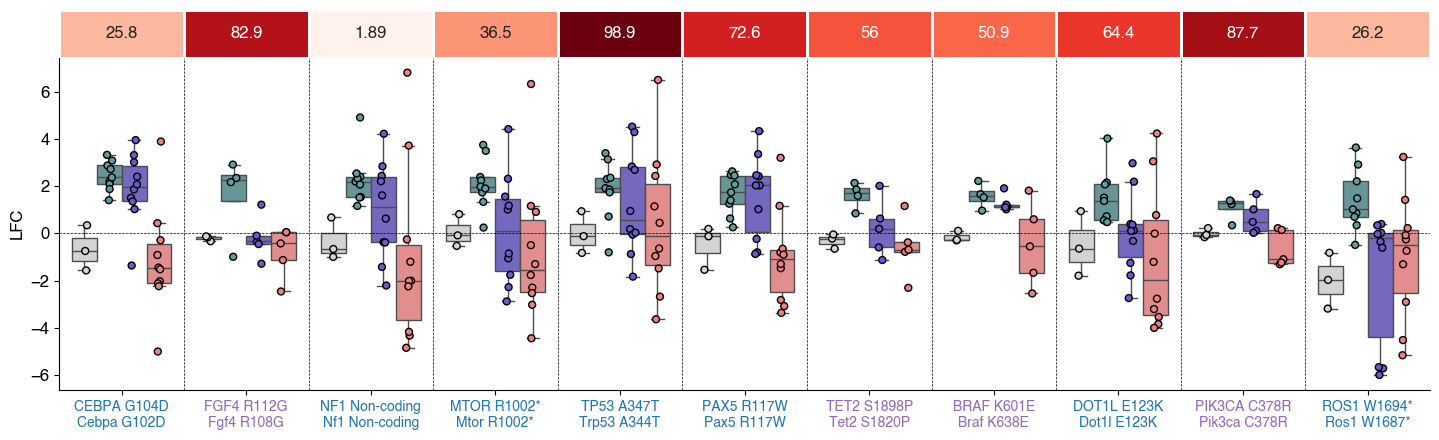

In [79]:
#plotting the top 12 hits (by delta from spleen vs. other tissues)
barplotter(bonespleen_specific, 'bonespleen_specific_hits', '',figwidth=14.5, figheight=4.5, save=True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


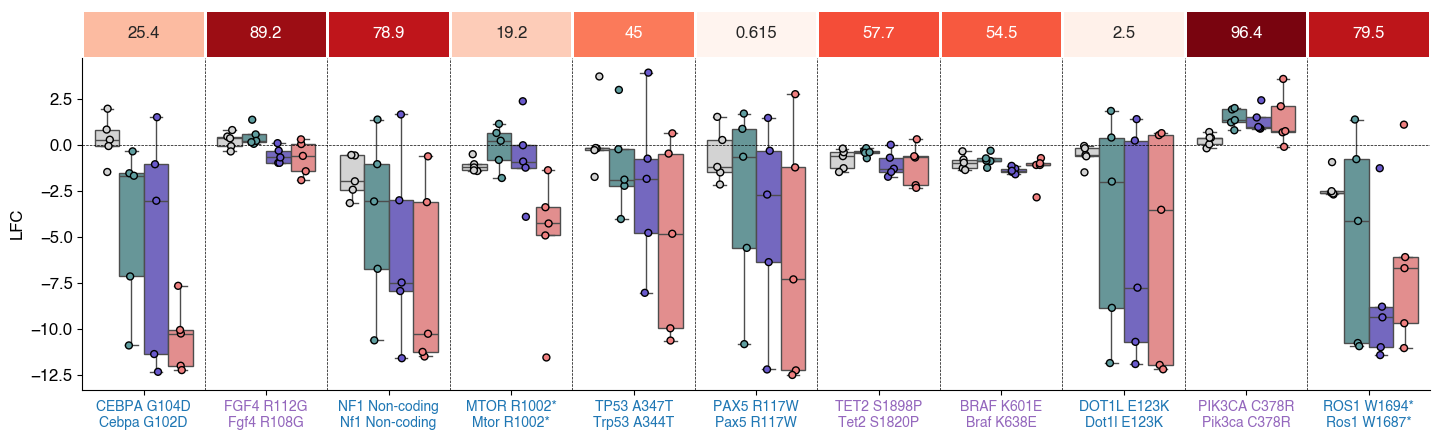

In [80]:
#plotting the top 12 hits (by delta from spleen vs. other tissues)
barplotter(bonespleen_specific_focused, 'bonespleen_specific_focused', '',figwidth=14.5, figheight=4.5, save=True, lib='focused')

Venn plot of two methods, focused

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


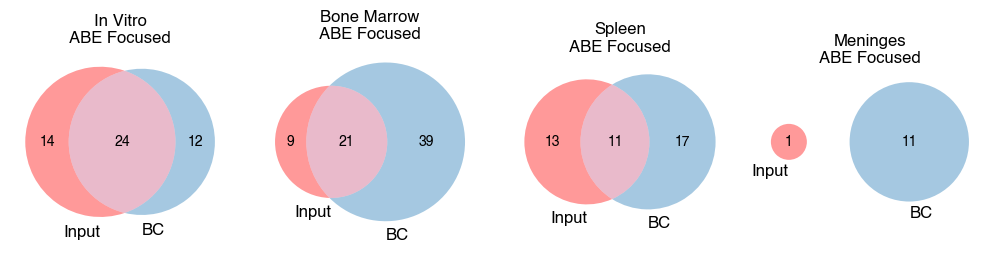

In [ ]:
FDR_cut = .1
editing_cut = 20
from matplotlib_venn import venn2

a1 = LFC_ABE_FOCUSED[LFC_ABE_FOCUSED['target_base_edit_perc'] > editing_cut].reset_index(drop=True)
a2 = LFC_ABE_FOCUSED_VS_BC[LFC_ABE_FOCUSED_VS_BC['target_base_edit_perc_epo'] > editing_cut].reset_index(drop=True)

fig, axe =plt.subplots(1,4, figsize=(10,6))

for idx,tissue in enumerate(['d15','bm','spleen','men']):
    a11 = a1[a1[f'FDR_{tissue}_fishers'] < FDR_cut].reset_index(drop=True)
    a22 = a2[a2[f'FDR_{tissue}_fishers'] < FDR_cut].reset_index(drop=True)

    a111 = a11[(a11[f'LFC_median_{tissue}'] > 1) | (a11[f'LFC_median_{tissue}'] < -1)].reset_index(drop=True)
    a222 = a22[(a22[f'LFC_median_{tissue}'] > 1) | (a22[f'LFC_median_{tissue}'] < -1)].reset_index(drop=True)

    venn2([set(a111['gRNA_id']), set(a222['gRNA_id'])], set_labels=('Input', 'BC'), set_colors=("red", "tab:blue"), ax=axe[idx])
    axe[idx].set_title(f'{name_dict[tissue]}\nABE Focused')
fig.tight_layout()
plt.savefig('figures/venn_abe_focused_vs_bc.pdf')
plt.show()